

## Multi-Armed Bandits (MAB) в рекомендательных системах
### *От неопределенности к эффективным решениям*

---

##  Проблема: "Дилемма исследования-применения"

Любая интерактивная система сталкивается с фундаментальным выбором:

**Exploit (Применять)**
- Показывать контент, который уже доказал свою эффективность
- *Максимизируем краткосрочную удовлетворенность*

**Explore (Исследовать)**  
- Тестировать новый контент для сбора данных
- *Инвестируем в долгосрочное качество*

> **Ключевой вопрос:**  
> Как найти оптимальный баланс?

```
День 1: [ПРОВЕРЕННАЯ] [ПРОВЕРЕННАЯ] [ПРОВЕРЕННАЯ] ← Безопасно, но скучно
День 2: [НОВАЯ] [ПРОВЕРЕННАЯ] [ПРОВЕРЕННАЯ] ← Рискуем, но учимся
```


---


##  Multi-Armed Bandits (Многорукие бандиты)

### Классическая аналогия:
```
[Игровой автомат 1] [Игровой автомат 2] [Игровой автомат 3] ...
```
- Каждый автомат = **"рука" (arm)**
- Выбор автомата = **действие (action)**  
- Выигрыш = **награда (reward)**

### Связь с рекомендациями:
| Концепция MAB | В рекомендательных системах |
|---------------|-----------------------------|
| **Arm** | Рекомендуемый товар/статья/видео |
| **Agent** | Алгоритм рекомендательной системы |
| **Reward** | Клик, лайк, покупка, просмотр |


---

## Примеры из практики

1. Рекомендации контента
```python
# Какой набор видео показать в первом экране?
arms = ["тренды", "персональные", "популярные", "новинки"]
```

2. Оптимизация уведомлений
- Какой заголовок письма даст больше открытий?
- Какой текст push-уведомления увеличит конверсию?

3. Ценообразование
- Какую цену показать пользователю?
- Тестирование скидок и акций

---



##  Формальная постановка задачи MAB

### Базовые определения

**Среда:**
- Имеется $K$ рук (arms): $\{a_1, a_2, ..., a_K\}$
- Каждая рука $a_i$ имеет неизвестное распределение наград $P_i(r)$
- Время дискретное: $t = 1, 2, 3, ..., T$

**На каждом шаге t:**
1. Агент выбирает руку $A_t \in \{1, ..., K\}$
2. Получает награду $R_t \sim P_{A_t}(r)$

• $P_{Aₜ}$ — это само распределение награды (для руки или действия номер Aₜ).  
• «r» внутри $P_{Aₜ}(r)$ — просто переменная, обозначающая возможное значение награды.  

**Цель:** Максимизировать кумулятивную награду
$$\sum_{t=1}^T R_t$$

### Ключевые метрики

#### **Сожаление vs Награда**

**Награда** = что получили сейчас  
**Сожаление** = что могли бы получить

---

#### **Пример:**

- **Выбрали** "Энергичную" музыку → **Награда** = 53% довольных
- **Могли выбрать** "Драматичную" → **Идеал** = 54% довольных  
- **Сожаление** = 54% - 53% = 1% потерянных пользователей

---

#### **Баланс:**

- **Только награда** → застряли в хорошем, но не лучшем
- **Только сожаление** → вечно недовольны результатами  
- **Вместе** → учимся на ошибках и растем 

*Сожаление - цена обучения, Награда - результат обучения*

**Средняя награда для руки i:**
$$Q(i) = \mathbb{E}[r \mid a = i]$$
- $Q(i)$ — истинное качество руки i, то что мы хотим узнать
- $𝔼$ — математическое ожидание, среднее значение
- $[r | a = i]$ — читается как 'награда r при условии что выбрана рука a = i'


**Сожаление (Regret) за время T:**

$$R(T) = \underbrace{T \cdot \max_i Q(i)}_{\text{Оптимальная стратегия}} - \underbrace{\sum_{t=1}^T \mathbb{E}[R_t]}_{\text{Наша стратегия}}$$

**Первая часть: $T \cdot \max_i Q(i)$**
- $\max_i Q(i)$ - максимальная средняя награда среди всех рук
- $T$ - общее количество шагов
- Это **максимально возможная награда**, если бы мы с самого начала знали лучшую руку и всегда выбирали её

**Вторая часть: $\sum_{t=1}^T \mathbb{E}[R_t]$**
- $\mathbb{E}[R_t]$ - математическое ожидание награды на шаге t
- Сумма ожидаемых наград за все T шагов
- Это **фактическая награда**, полученная нашей стратегией

### Пример расчета:

Пусть у нас 3 руки с истинными средними:
- Рука 1: $Q(1) = 0.3$
- Рука 2: $Q(2) = 0.7$ ← лучшая
- Рука 3: $Q(3) = 0.2$

**Оптимальная стратегия:**
$$T \cdot \max_i Q(i) = T \cdot 0.7 = 0.7T$$

**Наша стратегия (пример):**
- Первые 10 шагов: исследование всех рук
- Остальные шаги: выбор лучшей из известных
- Средняя награда: ~0.65

**Сожаление:**
$$R(T) = 0.7T - 0.65T = 0.05T$$

---

##  Виды сожаления

### Мгновенное сожаление (Instantaneous Regret)
$$\rho_t = \max_i Q(i) - Q(A_t)$$

**Компоненты:**
- $\max_i Q(i)$ - награда лучшей руки
- $Q(A_t)$ - награда выбранной руки на шаге t
- $\rho_t$ показывает, сколько мы потеряли на конкретном шаге

### Накопленное сожаление (Cumulative Regret)
$$R(T) = \sum_{t=1}^T \rho_t = \sum_{t=1}^T \left[\max_i Q(i) - Q(A_t)\right]$$


# **Конверсия в контексте многоруких бандитов**


**Конверсия** - это **доля успешных действий** от общего количества выборов.

```
Конверсия = (Количество успехов) / (Всего попыток)
```

## **В нашем музыкальном примере:**

### **Для одной "руки" (музыкального настроения):**
- **Успех**: пользователь поставил высокую оценку (≥ медианы)
- **Неудача**: пользователь поставил низкую оценку
- **Конверсия руки**: сколько раз это настроение приводило к успеху

**Пример:**
- Кластер 0 (Драматичная музыка): 538 успехов на 1000 показов
- **Конверсия = 538 / 1000 = 0.538 (53.8%)**

### **Для всего алгоритма:**
- **Общая конверсия**: средняя успешность всех рекомендаций
- **Показывает**, насколько хорошо алгоритм в целом выбирает руки

---

## **Типы конверсий в MAB**

### **1. Истинная конверсия (True Conversion Rate)**
```python
# Неизвестная реальная вероятность успеха каждой руки
true_rates = [0.538, 0.537, 0.534, 0.529, 0.529, 0.478]
```
- **Существует в природе**, но скрыта от алгоритмов
- **Основа для симуляции** пользовательских реакций

### **2. Текущая оценка конверсии (Q-values)**
```python
# То, что алгоритм "думает" о каждой руке
estimated_rates = [0.52, 0.51, 0.50, 0.49, 0.48, 0.47]
```
- **Вычисляется алгоритмом** на основе полученных наград
- **Постоянно обновляется** с новыми данными

### **3. Накопленная конверсия (Cumulative Conversion)**
```python
# Фактическая успешность алгоритма во времени
cumulative_conversion = total_successes / total_trials
```
- **Измеряет производительность** алгоритма
- **Сравнивается с идеальной стратегией**




---

# Алгоритмы

## ε-Greedy


**ε-Greedy** - это простейший вероятностный подход, явно разделяющий исследование и применение.

### Основная идея

> "С вероятностью ε исследуй случайно, с вероятностью 1-ε применяй лучшую известную руку"

### Философия

- Явное разделение времени на два режима:
  - **Exploitation (1-ε)**: использовать текущие знания
  - **Exploration (ε)**: собирать новую информацию
- Простота и интуитивная понятность

###  Способ решения

**На каждом шаге t:**
1. Генерируем случайное число $r \sim U[0,1]$
2. Если $r < \varepsilon$:
   - **Исследование**: выбираем случайную руку
3. Иначе:
   - **Применение**: выбираем руку с максимальной $Q_i(t-1)$

**Вероятность выбора руки i:**
$$P(A_t = i) = \begin{cases} 
1 - \varepsilon + \frac{\varepsilon}{K} & \text{если } i = \arg\max_j Q_j \\
\frac{\varepsilon}{K} & \text{иначе}
\end{cases}$$

 ```
- Рука 1: Технологии (истинная конверсия 70%)
- Рука 2: Спорт (истинная конверсия 50%) 
- Рука 3: Политика (истинная конверсия 30%)
- ε = 0.1 (10% на исследование)

Первые 10 шагов:
- Примерно 1 шаг из 10 — случайное исследование
- 9 шагов из 10 — выбор лучшей известной рубрики
- Постепенно алгоритм узнает, что Технологии работают лучше"

```


- **Простота реализации**
- **Явный контроль** баланса через параметр ε
- **Адаптивные версии** улучшают производительность

---

##  Upper Confidence Bound (UCB)

**UCB** - это детерминистический подход, основанный на **принципе оптимизма перед лицом неопределенности** (Optimism in the Face of Uncertainty).

### Основная идея

> "Предполагай лучшее о неизвестных руках, но проверяй свои предположения"


- Каждой руке присваивается **верхняя граница** её возможной награды
- Выбираем руку с **наибольшим верхним доверительным пределом**
- Автоматически балансирует исследование и применение:
  - Руки с высокой неопределенностью получают высокий UCB
  - Руки с доказанной эффективностью сохраняют высокий UCB

### Способ решения

$$A_t = \arg\max_{i} \left[\underbrace{Q_i(t-1)}_{\text{Текущая оценка}} + \underbrace{c \cdot \sqrt{\frac{\ln t}{N_i(t-1)}}}_{\text{Поправка на неопределенность}}\right]$$


**$Q_i(t-1)$ - текущая оценка награды руки i:**
$$Q_i(t-1) = \frac{1}{N_i(t-1)} \sum_{s=1}^{t-1} R_s \cdot \mathbb{I}\{A_s = i\}$$
где:
- $N_i(t-1)$ - сколько раз рука i была выбрана до шага t
- $\mathbb{I}\{A_s = i\}$ - индикаторная функция (1 если рука i выбрана на шаге s, иначе 0)

**$c \cdot \sqrt{\frac{\ln t}{N_i(t-1)}}$ - доверительный интервал:**
- $N_i(t-1)$ - количество выборов руки i (чем больше, тем меньше неопределенность)
- $t$ - общее количество шагов
- $\ln t$ - логарифм общего времени (медленно растущая функция)
- $c$ - параметр, контролирующий уровень "оптимизма"


```
"Представьте, что у нас есть две руки:

**Рука A:** Выбрана 100 раз, средняя награда 0.6
**Рука B:** Выбрана 2 раза, средняя награда 0.5

**Epsilon-Greedy** с большой вероятностью выберет руку A
**Но UCB может выбрать руку B! Почему?"

**[Драматическая пауза]**

"Потому что UCB вычисляет:
- **Для руки A:** 0.6 + маленькая поправка (много данных)
- **Для руки B:** 0.5 + большая поправка (мало данных)

И если поправка для B достаточно велика, UCB выберет именно ее!"
```

- **Детерминированный** выбор на каждом шаге
- **Явный баланс** exploration/exploitation через формулу
- **Параметр c** контролирует уровень "оптимизма"


---

## Thompson Sampling - Байесовский анализ


**Thompson Sampling** - это байесовский вероятностный подход, основанный на **сэмплировании из апостериорного распределения**.

### Основная идея

> "Выбирай действия пропорционально вероятности того, что они оптимальны"

### Философия

- Поддерживаем **распределение веры** о наградах каждой руки
- На каждом шаге **семплируем** возможные значения наград из апостериорного распределения
- Выбираем руку, которая **выглядит лучшей** в данном сэмпле
- Естественный баланс исследования и применения через неопределенность в распределениях

### Способ решения

**Для бинарных наград:**
1. Инициализируем Beta распределения: $Q_i \sim Beta(\alpha_i, \beta_i)$
2. На каждом шаге t:
   - **Сэмплируем**: $\theta_i \sim Beta(\alpha_i, \beta_i)$ для всех i
   - **Выбираем**: $A_t = \arg\max_i \theta_i$
   - **Наблюдаем** награду $R_t$
   - **Обновляем** апостериорное:
     - Если $R_t = 1$: $\alpha_{A_t} \leftarrow \alpha_{A_t} + 1$
     - Если $R_t = 0$: $\beta_{A_t} \leftarrow \beta_{A_t} + 1$

**Для непрерывных наград** (Normal-Normal conjugacy):
- Априорное: $Q_i \sim \mathcal{N}(\mu_i^0, (\sigma_i^0)^2)$
- Апостериорное обновление по формулам нормального распределения


Thompson Sampling реализует принцип **probability matching**:
$$P(A_t = i) = P(\text{рука i оптимальная} | \text{история})$$

```
Бинарный случай (лайк/дизлайк):
- Рука 'Джаз': alpha=8, beta=3 (8 лайков, 3 дизлайка)
- Генерируем θ ∼ Beta(8,3) - обычно получаем 0.6-0.8

Непрерывный случай (время прослушивания):
- Рука 'Рок': mu=180, sigma2=100 (в среднем 180 секунд)
- Генерируем θ ∼ N(180,100) - обычно 160-200 секунд"
```


- **Естественный баланс** exploration/exploitation
- **Отличная эмпирическая производительность**
- **Байесовская интерпретация**
- **Автоматическая адаптация** к неопределенности

---

## Сравнение подходов

| Аспект | UCB | ε-Greedy | Thompson Sampling |
|--------|-----|----------|-------------------|
| **Подход** | Детерминированный | Вероятностный | Байесовский вероятностный |
| **Философия** | Оптимизм перед неопределенностью | Явное разделение режимов | Probability matching |
| **Баланс E/E** | Неявный через формулу | Явный через параметр | Естественный через распределения |
| **Теоретические гарантии** | Сильные | Слабые (с адаптивным ε) | Сильные |
| **Практическая эффективность** | Хорошая | Средняя | Отличная |

---

## **Как конверсия влияет на алгоритмы**

### **Для ε-greedy:**
```python
if random() < epsilon:
    выбрать случайную руку          # Исследование
else:
    выбрать руку с max(conversion)  # Применение
```

### **Для UCB:**
```python
# Выбор = текущая конверсия + "бонус неопределенности"
score = current_conversion + sqrt(2*log(total_trials)/arm_trials)
```

### **Для Thompson Sampling:**
```python
# Сэмплируем возможные конверсии из распределения
sampled_rate = beta(успехи + 1, неудачи + 1)
выбрать руку с max(sampled_rate)
```
---

## Когда что использовать?

### **UCB** - когда нужно:
- Гарантированные теоретические границы
- Детерминированное и интерпретируемое поведение
- Простота реализации

### **ε-Greedy** - когда:
- Очень простое решение
- Явный контроль над исследованием
- Быстрый прототип

### **Thompson Sampling** - когда:
- Максимальная практическая эффективность
- Естественная обработка неопределенности
- Байесовская интерпретация важна




### **Ограничение классических MAB:**
> "Один подход подходит всем" - но пользователи разные!

**Проблема:** В классических MAB мы ищем *единственную лучшую руку* для всех пользователей.

**Решение:** Учитываем контекст - ищем *лучшую руку для данного пользователя в данный момент*.

---

## **Контекстные бандиты (Contextual Bandits)**

### **Основная идея:**
> Награда зависит не только от выбранной руки, но и от контекста

**Формально:**
$$E[R_t(a) | x_t] = f(x_t, a)$$

где:
- $x_t$ - вектор контекста (features пользователя, времени, устройства)
- $a$ - выбранная рука (рекомендация)
- $f$ - неизвестная функция, которую мы учим

### **Пример контекста:**

```python
user_context = {
    'age': 25,
    'location': 'Moscow', 
    'device': 'mobile',
    'time_of_day': 'evening',
    'previous_clicks': [123, 456, 789]
}
```



---

## **Нейросетевые бандиты (Neural Bandits)**

### **Когда простых моделей недостаточно:**
Сложные нелинейные зависимости в данных

### **Архитектура:**
```python
# Нейросеть для предсказания награды
reward = neural_net(context, arm_embedding)
```

### **Подходы:**
- **Neural UCB**: доверительные интервалы через градиенты
- **Bayesian Neural Networks**: моделирование неопределенности
- **Deep Representation Learning**: обучение представлений для контекста и рук

---

## **Многорукие бандиты для списков**

### **Проблема:**
Рекомендуем не один объект, а **список** (ленту, плейлист)

### **Подходы:**
**Combinatorial Bandits:**
- Выбираем подмножество рук
- Награда - нелинейная функция выбранных рук

**Cascading Models:**
- Пользователь просматривает список сверху вниз
- Награда = клик на первом подходящем объекте

---

## **Другие продвинутые направления**

### **Бандиты с ограничениями:**
- Максимизировать награду при ограничениях
- Примеры: fairness, diversity, бизнес-правила

### **Мета-обучение:**
- Быстрая адаптация к новым пользователям
- Перенос знаний между доменами

### **Байесовская оптимизация:**
- Оптимизация гиперпараметров моделей
- A/B тестирование с адаптивным распределением трафика

---

## **Практические рекомендации**

### **Этап 1: Базовый MAB**
- Начните с ε-Greedy или UCB
- Сфокусируйтесь на сборе качественных данных

### **Этап 2: Контекстные бандиты**  
- Добавьте пользовательские features
- Реализуйте простые контекстные модели

### **Этап 3: Продвинутые подходы**
- Экспериментируйте с нейросетевыми архитектурами
- Решайте проблему рекомендации списков

### **Этап 4: Производственная система**
- Оптимизируйте latency и масштабируемость
- Внедрите автоматическое A/B тестирование

---

## **Ключевые выводы**

### **Эволюция сложности:**
```
Static A/B → Classic MAB → Contextual Bandits → Neural Bandits
```

### **Что выбирать:**
- **Стартап/прототип:** Classic MAB
- **Производственная система:** Contextual Bandits  
- **Высокая точность:** Neural Bandits
- **Специфичные задачи:** Combinatorial/Cascading Bandits

### **Главный принцип:**
> Начинайте с простого, усложняйтесь постепенно, всегда измеряйте влияние на бизнес-метрики
```

In [25]:
! pip install datasets huggingface_hub scikit-learn plotly seaborn ipywidgets lightgbm optuna -q

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output
import lightgbm as lgb
import optuna
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim
from huggingface_hub import hf_hub_download
from collections import Counter

pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

https://huggingface.co/datasets/yandex/yambda  

https://huggingface.co/datasets/Acervans/Lastfm-VADS



### Общая информация о датасете

**Last.fm-VADS** - это датасет музыкальных взаимодействий пользователей с обогащенными эмоциональными признаками:

- **Источник**: Last.fm API
- **Объем**: ~100,000 взаимодействий
- **Период**: реальные временные метки прослушиваний
- **Особенность**: добавлены эмоциональные признаки VAD для треков

### Структура данных

Датасет содержит следующие столбцы:

#### **Базовые идентификаторы**
- **`user_id`** - уникальный идентификатор пользователя
- **`item_id`** - уникальный идентификатор трека  
- **`rating`** - оценка взаимодействия (нормированная 0-1)

#### **Эмоциональные признаки VAD**
- **`v`** (Valence) - валентность, эмоциональная позитивность
  - Диапазон: 0.0 (очень грустно) → 1.0 (очень радостно)
  - Пример: грустная баллада = 0.2, веселый поп-хит = 0.8

- **`a`** (Arousal) - возбуждение, энергетический уровень
  - Диапазон: 0.0 (очень спокойно) → 1.0 (очень энергично)
  - Пример: медитативная музыка = 0.1, хард-рок = 0.9

- **`d`** (Dominance) - доминантность, интенсивность
  - Диапазон: 0.0 (очень нежно) → 1.0 (очень мощно)
  - Пример: акустическая гитара = 0.3, оркестровая музыка = 0.8

#### **Мета-информация**
- **`timestamp`** - временная метка взаимодействия
- **`tags`** - музыкальные теги, присвоенные пользователями

## Загрузка и анализ данных Last.fm

In [27]:
inter_file = hf_hub_download(
        repo_id="Acervans/Lastfm-VADS",
        filename="lastfm_recbole.inter",
        repo_type="dataset"
    )

item_file = hf_hub_download(
        repo_id="Acervans/Lastfm-VADS", 
        filename="lastfm_recbole.item",
        repo_type="dataset"
    )

inter_df = pd.read_csv(inter_file, sep='\t')
item_df = pd.read_csv(item_file, sep='\t')

display(inter_df.head())
print("-"*40)
display(item_df.head())
    

,user_id:token,track_id:token,rating:float,timestamp:float
0,1,35151,5.0,NaN
1,1,82497,3.3,NaN
2,1,97967,4.2,NaN
3,1,105492,3.5,NaN
4,1,124021,3.9,NaN


----------------------------------------


,track_id:token,tags:token_seq,artist_id:token,album_id:token,v:float,a:float,d:float,stsc:float
0,1,folk folk folk folk folk folk folk folk countr...,136900,227929.0,NaN,NaN,NaN,NaN
1,2,christmas christmas christmas christmas christ...,82136,NaN,0.571557,0.415936,0.474975,0.860455
2,3,wrong wrong wrong wrong wrong wrong wrong wrong,127107,NaN,0.461959,0.488838,0.363161,0.777778
3,4,melodicdeathmetal melodicdeathmetal melodicdea...,57668,144260.0,0.522406,0.469124,0.492206,0.848150
4,5,slowcore slowcore slowcore slowcore slowcore s...,117533,99037.0,0.510328,0.328283,0.369372,0.827151


In [28]:
inter_df_clean = inter_df.rename(columns={
        'user_id:token': 'user_id',
        'track_id:token': 'item_id', 
        'rating:float': 'rating',
        'timestamp:float': 'timestamp'
    })

item_df_clean = item_df.rename(columns={
        'track_id:token': 'track_id',
        'tags:token_seq': 'tags',
        'artist_id:token': 'artist_id',
        'album_id:token': 'album_id', 
        'v:float': 'valence',
        'a:float': 'arousal',
        'd:float': 'dominance',
        'stsc:float': 'sentiment_ratio'
    })
display(inter_df_clean.head())
print("-"*40)
display(item_df_clean.head())

,user_id,item_id,rating,timestamp
0,1,35151,5.0,NaN
1,1,82497,3.3,NaN
2,1,97967,4.2,NaN
3,1,105492,3.5,NaN
4,1,124021,3.9,NaN


----------------------------------------


,track_id,tags,artist_id,album_id,valence,arousal,dominance,sentiment_ratio
0,1,folk folk folk folk folk folk folk folk countr...,136900,227929.0,NaN,NaN,NaN,NaN
1,2,christmas christmas christmas christmas christ...,82136,NaN,0.571557,0.415936,0.474975,0.860455
2,3,wrong wrong wrong wrong wrong wrong wrong wrong,127107,NaN,0.461959,0.488838,0.363161,0.777778
3,4,melodicdeathmetal melodicdeathmetal melodicdea...,57668,144260.0,0.522406,0.469124,0.492206,0.848150
4,5,slowcore slowcore slowcore slowcore slowcore s...,117533,99037.0,0.510328,0.328283,0.369372,0.827151


## Детальный анализ данных с визуализацией

In [29]:
print("Основные характеристики: ")
print(f"Взаимодействий: {len(inter_df_clean):,}")
print(f"Уникальных пользователей: {inter_df_clean['user_id'].nunique():,}")
print(f"Уникальных треков в взаимодействиях: {inter_df_clean['item_id'].nunique():,}")
print(f"Уникальных треков в метаданных: {len(item_df_clean):,}")

Основные характеристики: 
Взаимодействий: 2,200,761
Уникальных пользователей: 52,780
Уникальных треков в взаимодействиях: 815,631
Уникальных треков в метаданных: 815,631


Анализ оценок: 
  Средний рейтинг: 3.14
  Медианный рейтинг: 3.60
  Стандартное отклонение: 1.64


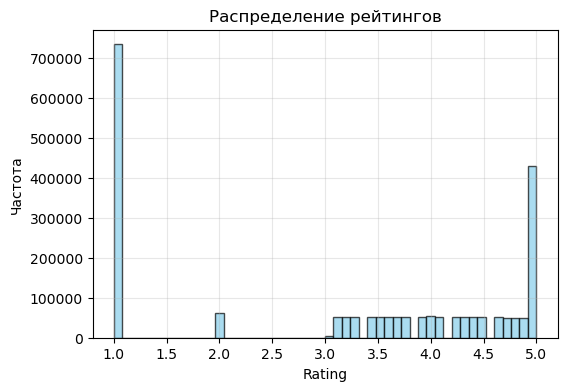

In [30]:
print("Анализ оценок: ")
stats = inter_df_clean['rating'].describe()
print(f"  Средний рейтинг: {stats['mean']:.2f}")
print(f"  Медианный рейтинг: {stats['50%']:.2f}")
print(f"  Стандартное отклонение: {stats['std']:.2f}")
plt.figure(figsize=(6,4))
plt.hist(inter_df_clean['rating'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение рейтингов")
plt.xlabel("Rating")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

### Преобразования задачи в проблему многорукого бандита:

Зачем нужен бинарный reward:

1. **Формулировка задачи бандита**
Мультиармные бандиты работают с **бинарными наградами** (успех/неудача):
- **1** = рекомендация успешна (пользователю понравилось)
- **0** = рекомендация неуспешна (пользователю не понравилось)

2. **Интерпретируемость**
```python
# До: непрерывные оценки 1-5
rating = 4.2  # Что это значит? Хорошо или плохо?

# После: бинарный успех
reward = 1    # Успех! Рекомендация сработала
reward = 0    # Неудача. Нужно пробовать другие варианты
```

3. **Определение "успешной" рекомендации**
Используем **медиану** как объективный порог:
- Оценки **выше медианы** = успех 
- Оценки **ниже медианы** = неудача 

4. **Для алгоритмов бандитов**
```python
# Каждый бандит (музыкальное настроение) имеет свою вероятность успеха
true_conversion_rates = [0.663, 0.659, 0.649, 0.648, 0.603]
# Это значит: 
# - Кластер 0: 66.3% рекомендаций успешны
# - Кластер 4: 60.3% рекомендаций успешны
```
Пример:  
- **Бандит выбирает** музыкальное настроение
- **Пользователь реагирует**: ставит оценку
- **Система получает reward**: 1 если оценка >= медианы, иначе 0
- **Алгоритм учится**: какие настроения чаще приводят к успеху

```python
# День 1: Рекомендуем "Энергичную" музыку (бандит 0)
# Пользователь ставит оценку 4.2 (медиана = 3.5) → reward = 1
# Алгоритм: "Отлично! Энергичная музыка работает!"

# День 2: Рекомендуем "Грустную" музыку (бандит 3)  
# Пользователь ставит оценку 2.8 → reward = 0
# Алгоритм: "Грустная музыка не нравится, буду реже её рекомендовать"
```

Бинарный reward превращает сложные пользовательские оценки в простую сигнатуру "работает/не работает", которую могут использовать алгоритмы мультиармных бандитов для оптимизации рекомендаций.

Бинарный reward: 
  Порог (медиана): 3.6
  Доля успехов (>= медианы): 52.0%


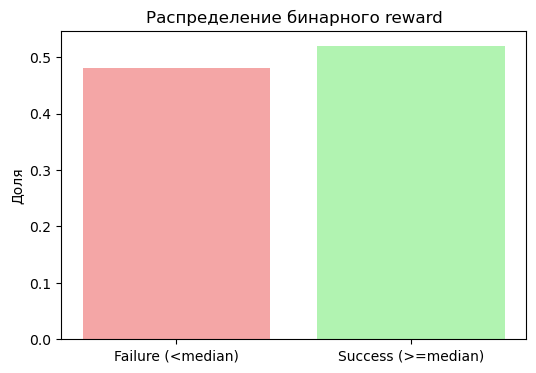

In [31]:
print("Бинарный reward: ")
median_rating = inter_df_clean['rating'].median()
inter_df_clean['reward'] = (inter_df_clean['rating'] >= median_rating).astype(int)
rate = inter_df_clean['reward'].mean()
print(f"  Порог (медиана): {median_rating}")
print(f"  Доля успехов (>= медианы): {rate:.1%}")
plt.figure(figsize=(6,4))
plt.bar(['Failure (<median)', 'Success (>=median)'], [1-rate, rate],
        color=['lightcoral','lightgreen'], alpha=0.7)
plt.title("Распределение бинарного reward")
plt.ylabel("Доля")
plt.show()
print()

Анализ VAD признаков: 
  valence:
    Записей: 583710 / 815631 (71.6%)
    Среднее: 0.520, STD: 0.045


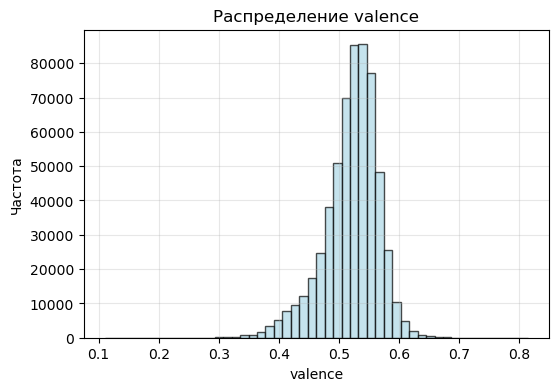

  arousal:
    Записей: 583710 / 815631 (71.6%)
    Среднее: 0.455, STD: 0.030


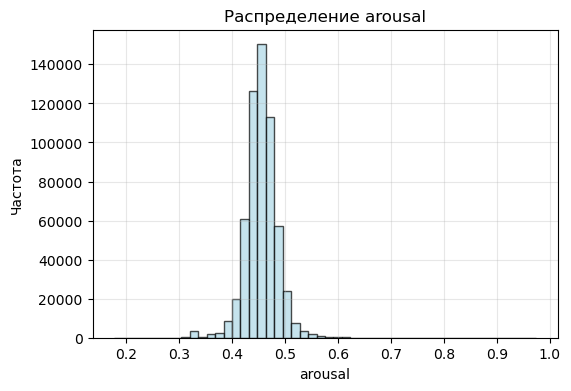

  dominance:
    Записей: 583710 / 815631 (71.6%)
    Среднее: 0.459, STD: 0.038


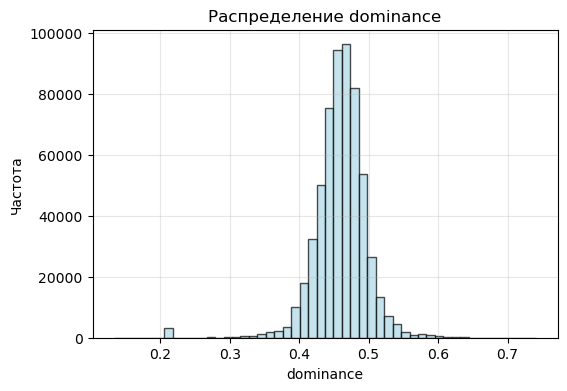

In [32]:
print("Анализ VAD признаков: ")
for feature in ['valence', 'arousal', 'dominance']:
    if feature in item_df_clean.columns:
        data = item_df_clean[feature].dropna()
        stats_vad = data.describe()
        print(f"  {feature}:")
        print(f"    Записей: {len(data)} / {len(item_df)} "
              f"({len(data)/len(item_df)*100:.1f}%)")
        print(f"    Среднее: {stats_vad['mean']:.3f}, STD: {stats_vad['std']:.3f}")

        plt.figure(figsize=(6,4))
        plt.hist(data, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
        plt.title(f"Распределение {feature}")
        plt.xlabel(feature)
        plt.ylabel("Частота")
        plt.grid(alpha=0.3)
        plt.show()
print()

Анализ тэгов: 
  Треков с тегами: 757602 / 815631 (92.9%)
  Топ-5 тегов:
    rock: 715341
    hiphop: 582944
    electronic: 568903
    pop: 520735
    indie: 453098
Все тэги Counter({'rock': 715341, 'hiphop': 582944, 'electronic': 568903, 'pop': 520735, 'indie': 453098, 'rap': 332376, 'alternative': 319340, 'seenlive': 316756, 'metal': 258678, 'femalevocalists': 254170, 'instrumental': 220932, 'ambient': 199197, 'alternativerock': 192705, 'folk': 189706, 'japanese': 184065, 'indierock': 175076, 'punk': 163207, 'jazz': 162668, 'classicrock': 159020, 'experimental': 158899, 'singersongwriter': 156662, 'hardrock': 131405, 'classical': 131334, 'soundtrack': 131305, 'indiepop': 129449, 'dance': 127372, '80s': 125026, 'heavymetal': 124630, 'soul': 123912, 'british': 119264, 'progressiverock': 118382, 'hardcore': 117601, 'rnb': 105839, 'blackmetal': 105625, 'punkrock': 101922, 'chillout': 98549, 'metalcore': 98469, 'jpop': 98032, 'trap': 97682, 'american': 97304, 'deathmetal': 94650, 'house'

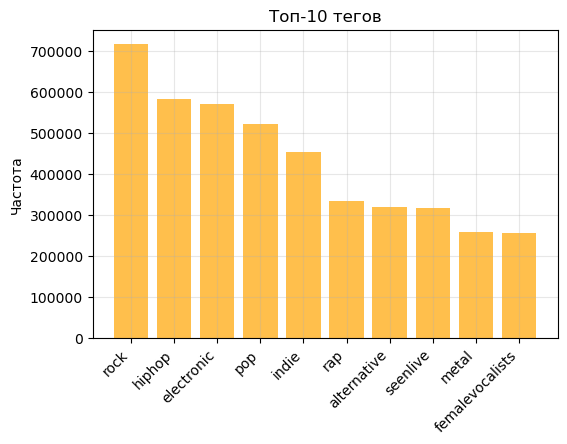

In [33]:
print("Анализ тэгов: ")
if 'tags' in item_df_clean.columns:
    tags_series = item_df_clean['tags'].dropna()
    total = len(item_df_clean)
    filled = len(tags_series)
    print(f"  Треков с тегами: {filled} / {total} ({filled/total*100:.1f}%)")

    all_tags = [tag for tags in tags_series for tag in tags.split()]
    counts = Counter(all_tags)

    print("  Топ-5 тегов:")
    for tag, cnt in counts.most_common(5):
        print(f"    {tag}: {cnt}")
    print(f'Все тэги {counts}')
    top_tags = counts.most_common(10)
    labels, freqs = zip(*top_tags)
    plt.figure(figsize=(6,4))
    plt.bar(labels, freqs, color='orange', alpha=0.7)
    plt.title("Топ-10 тегов")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Частота")
    plt.grid(alpha=0.3)
    plt.show()

# **Использование жанровых тегов в рекомендательной системе**

## **1. Создание жанровых профилей пользователей**
- Анализировать историю прослушиваний для определения предпочтений
- Выявлять доминирующие жанры (рок, хип-хоп, электроника) для каждого пользователя
- Строить персональные жанровые "отпечатки" на основе 92.9% треков с тегами

## **2. Обогащение эмоциональных кластеров**
- Сочетать жанры с эмоциональными паттернами: "Энергичный рок", "Спокойный инди", "Драматичный хип-хоп"
- Создать 15-20 гибридных категорий вместо 6 чисто эмоциональных
- Уточнить рекомендации через двойную привязку: настроение + жанр

## **3. Улучшение алгоритмов MAB**
- Добавить жанровые веса в функцию выбора бандитов
- Thompson Sampling учитывает не только конверсию настроений, но и жанровое соответствие
- Neural Bandit получает жанровые фичи как дополнительный контекст

## **4. Персонализация стратегий exploration**
- Для фанатов рока активнее исследовать драматичные и энергичные настроения
- Для любителей электроники тестировать более разнообразные эмоциональные паттерны
- Снижать исследование неподходящих жанровых комбинаций

## **5. Анализ кросс-жанровых паттернов**
- Выявить, какие эмоциональные кластеры лучше работают для рока vs поп-музыки
- Определить оптимальное время суток для разных жанрово-эмоциональных сочетаний
- Обнаружить скрытые предпочтения: например, рок-фанаты могут любить спокойный инди

In [34]:
def process_only_valid_timestamps(inter_df):
    """Используем только записи с валидными timestamp"""
    df = inter_df.copy()
    
    # фильтруем валидные timestamp
    valid_mask = (df['timestamp'].notna()) & (df['timestamp'] > 0)
    df_valid = df[valid_mask].copy()
    
    print(f"Всего записей: {len(df):,}")
    print(f"Валидных timestamp: {len(df_valid):,} ({len(df_valid)/len(df):.1%})")
    print(f"Будет удалено: {len(df) - len(df_valid):,} записей")
    
    # конвертируем timestamp
    df_valid['datetime'] = pd.to_datetime(df_valid['timestamp'], unit='s')
    
    # временные фичи
    df_valid['hour'] = df_valid['datetime'].dt.hour.astype(int)
    df_valid['day_of_week'] = df_valid['datetime'].dt.dayofweek.astype(int)
    df_valid['is_weekend'] = df_valid['day_of_week'].isin([5, 6]).astype(int)
    df_valid['month'] = df_valid['datetime'].dt.month.astype(int)
    
    # сбрасываем индекс и добавляем порядковый номер
    df_valid = df_valid.reset_index(drop=True)
    df_valid['sequence_id'] = df_valid.index
    
    
    return df_valid

inter_df_processed = process_only_valid_timestamps(inter_df_clean)

print("Проверка результатов: ")
print("Столбцы в данных:", inter_df_processed.columns.tolist())
print(" Информация о данных:")
print(inter_df_processed.info())
print(f" Размер данных: {len(inter_df_processed):,} записей")

if not inter_df_processed.empty:
    print(" Первые 3 записи с временными фичами:")
    display_cols = ['sequence_id', 'hour', 'day_of_week', 'is_weekend', 'month', 'reward']
    available_cols = [col for col in display_cols if col in inter_df_processed.columns]
    print(inter_df_processed[available_cols].head(3))
    
    # Статистика по временным фичам
    print(f"Диапазон часов: {inter_df_processed['hour'].min():02d}:00 - {inter_df_processed['hour'].max():02d}:00")
    print(f"Диапазон месяцев: {inter_df_processed['month'].min()} - {inter_df_processed['month'].max()}")
    print(f"Выходные дни: {inter_df_processed['is_weekend'].sum():,} ({inter_df_processed['is_weekend'].mean():.1%})")

Всего записей: 2,200,761
Валидных timestamp: 1,179,868 (53.6%)
Будет удалено: 1,020,893 записей
Проверка результатов: 
Столбцы в данных: ['user_id', 'item_id', 'rating', 'timestamp', 'reward', 'datetime', 'hour', 'day_of_week', 'is_weekend', 'month', 'sequence_id']
 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179868 entries, 0 to 1179867
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   user_id      1179868 non-null  int64         
 1   item_id      1179868 non-null  int64         
 2   rating       1179868 non-null  float64       
 3   timestamp    1179868 non-null  float64       
 4   reward       1179868 non-null  int64         
 5   datetime     1179868 non-null  datetime64[ns]
 6   hour         1179868 non-null  int64         
 7   day_of_week  1179868 non-null  int64         
 8   is_weekend   1179868 non-null  int64         
 9   month        1179868 non-null  in

ТОП-10 часов по успешности:
18:00 - Успешность: 0.351 | Взаимодействий: 59,204.0 | Реальных данных: 100%
16:00 - Успешность: 0.349 | Взаимодействий: 60,207.0 | Реальных данных: 100%
17:00 - Успешность: 0.347 | Взаимодействий: 59,931.0 | Реальных данных: 100%
13:00 - Успешность: 0.346 | Взаимодействий: 53,778.0 | Реальных данных: 100%
10:00 - Успешность: 0.343 | Взаимодействий: 44,490.0 | Реальных данных: 100%
08:00 - Успешность: 0.341 | Взаимодействий: 38,100.0 | Реальных данных: 100%
12:00 - Успешность: 0.340 | Взаимодействий: 51,214.0 | Реальных данных: 100%
09:00 - Успешность: 0.339 | Взаимодействий: 41,018.0 | Реальных данных: 100%
11:00 - Успешность: 0.335 | Взаимодействий: 48,181.0 | Реальных данных: 100%
15:00 - Успешность: 0.335 | Взаимодействий: 58,522.0 | Реальных данных: 100%


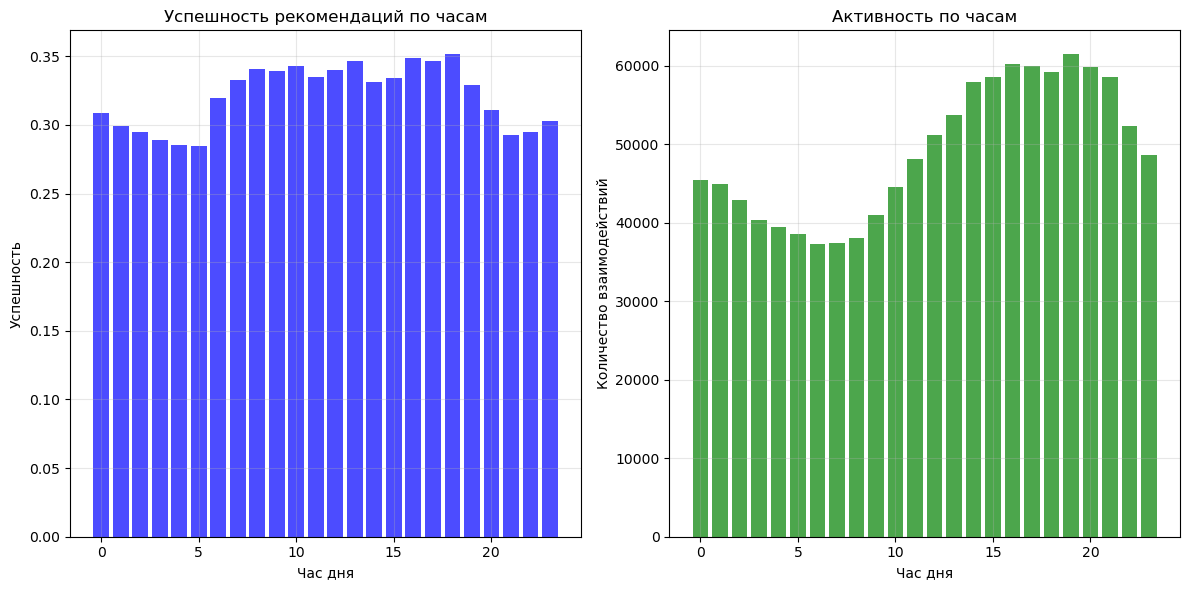

In [35]:
def analyze_hourly_patterns(df):
    required_cols = ['hour', 'reward']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"Ошибка: Отсутствуют столбцы {missing_cols}")
        return None
    
    # флаг качества данных, если есть информация о времени
    if 'datetime' in df.columns:
        df = df.copy()
        df['has_real_time'] = df['datetime'].notna()
    
    hourly_stats = df.groupby('hour').agg({
        'reward': ['mean', 'count', 'std']
    }).round(4)
    
    hourly_stats.columns = ['success_rate', 'interactions', 'std_dev']
    
    # добавляем информацию о качестве данных, если доступно
    if 'has_real_time' in df.columns:
        data_quality = df.groupby('hour')['has_real_time'].mean()
        hourly_stats['data_quality'] = data_quality.round(4)
    else:
        hourly_stats['data_quality'] = 1.0 
    
    # сортируем по успешности
    hourly_sorted = hourly_stats.sort_values('success_rate', ascending=False)
    
    print("ТОП-10 часов по успешности:")
    for hour, row in hourly_sorted.head(10).iterrows():
        real_pct = row['data_quality'] * 100
        print(f"{hour:02d}:00 - Успешность: {row['success_rate']:.3f} | "
              f"Взаимодействий: {row['interactions']:>7,} | "
              f"Реальных данных: {real_pct:.0f}%")

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(hourly_stats.index, hourly_stats['success_rate'], alpha=0.7, color='blue')
    plt.xlabel('Час дня')
    plt.ylabel('Успешность')
    plt.title('Успешность рекомендаций по часам')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.bar(hourly_stats.index, hourly_stats['interactions'], alpha=0.7, color='green')
    plt.xlabel('Час дня')
    plt.ylabel('Количество взаимодействий')
    plt.title('Активность по часам')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return hourly_sorted
hourly_analysis = analyze_hourly_patterns(inter_df_processed)

## Кластеризация музыкальных настроения

Треков с полными VAD данными: 583710
Используется 6 кластеров
Описание кластеров:
Кластер 0: Драматичная/напряженная
  Valence: 0.502, Arousal: 0.464, Size: 153425
Кластер 1: Спокойная/медитативная
  Valence: 0.548, Arousal: 0.440, Size: 181589
Кластер 2: Драматичная/напряженная
  Valence: 0.432, Arousal: 0.489, Size: 61670
Кластер 3: Энергичная/радостная
  Valence: 0.559, Arousal: 0.479, Size: 96225
Кластер 4: Грустная/меланхоличная
  Valence: 0.480, Arousal: 0.337, Size: 5255
Кластер 5: Сбалансированная
  Valence: 0.516, Arousal: 0.423, Size: 85546


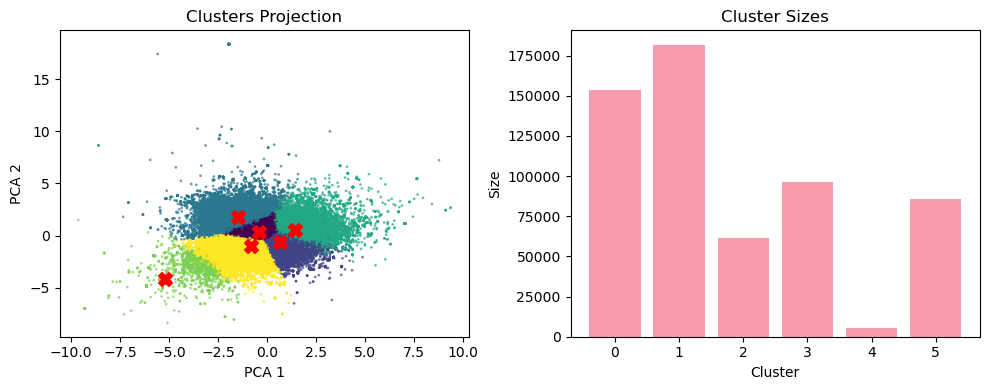

In [36]:
def describe_mood_cluster_simple(v, a, global_stats):
    """описание кластера на основе valence и arousal"""
    v_high = v > global_stats['valence_mean'] + 0.3 * global_stats['valence_std']
    v_low = v < global_stats['valence_mean'] - 0.3 * global_stats['valence_std']
    a_high = a > global_stats['arousal_mean'] + 0.3 * global_stats['arousal_std']
    a_low = a < global_stats['arousal_mean'] - 0.3 * global_stats['arousal_std']
    
    if v_high and a_high: return "Энергичная/радостная"
    elif v_low and a_high: return "Драматичная/напряженная"
    elif v_high and a_low: return "Спокойная/медитативная"
    elif v_low and a_low: return "Грустная/меланхоличная"
    elif v_high: return "Позитивная"
    elif a_high: return "Энергичная"
    else: return "Сбалансированная"

def plot_fast_clusters(vad_scaled, clusters, centers, n_clusters):
    pca = PCA(n_components=2)
    vad_2d = pca.fit_transform(vad_scaled)
    centers_2d = pca.transform(centers)
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.scatter(vad_2d[:, 0], vad_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=1)
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=100)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Clusters Projection')
    
    plt.subplot(1, 2, 2)
    cluster_sizes = [np.sum(clusters == i) for i in range(n_clusters)]
    plt.bar(range(n_clusters), cluster_sizes, alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('Size')
    plt.title('Cluster Sizes')
    
    plt.tight_layout()
    plt.show()

def create_music_clusters_fast(item_df, n_clusters):
    vad_complete = item_df[['valence', 'arousal', 'dominance']].dropna()
    print(f"Треков с полными VAD данными: {len(vad_complete)}")
    print(f"Используется {n_clusters} кластеров")
    
    scaler = StandardScaler()
    vad_scaled = scaler.fit_transform(vad_complete)
    
    # быстрая кластеризация
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(vad_scaled)
    
    # добавляем кластеры в данные
    cluster_mapping = dict(zip(vad_complete.index, clusters))
    item_df['mood_cluster'] = item_df.index.map(cluster_mapping)
    
    # анализируем кластеры
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    mood_descriptions = []
    print("Описание кластеров:")
    
    global_stats = {
        'valence_mean': vad_complete['valence'].mean(),
        'arousal_mean': vad_complete['arousal'].mean(),
        'valence_std': vad_complete['valence'].std(),
        'arousal_std': vad_complete['arousal'].std(),
    }
    
    for i, center in enumerate(cluster_centers):
        v, a, d = center
        mood_desc = describe_mood_cluster_simple(v, a, global_stats)
        
        mood_descriptions.append(mood_desc)
        print(f"Кластер {i}: {mood_desc}")
        print(f"  Valence: {v:.3f}, Arousal: {a:.3f}, Size: {np.sum(clusters == i)}")
    
    plot_fast_clusters(vad_scaled, clusters, kmeans.cluster_centers_, n_clusters)
    
    return item_df, cluster_centers, mood_descriptions


item_df_clean, centers, mood_descriptions = create_music_clusters_fast(item_df_clean, 6)

# объединяем взаимодействия с кластерами настроений
inter_with_mood = inter_df_clean.merge(
    item_df_clean[['track_id', 'mood_cluster']].rename(columns={'track_id': 'item_id'}),
    on='item_id',
    how='inner'
)



Взаимодействий с известным настроением: 2200761
Эффективность кластеров:


,mood_cluster,mood_description,conversion_rate,total_interactions,avg_rating
2,2.0,Драматичная/напряженная,0.538,176922,3.206
1,1.0,Спокойная/медитативная,0.537,599946,3.202
5,5.0,Сбалансированная,0.534,241151,3.190
0,0.0,Драматичная/напряженная,0.529,516279,3.172
3,3.0,Энергичная/радостная,0.529,280456,3.170
4,4.0,Грустная/меланхоличная,0.478,13078,2.971


Лучший кластер: 2 (Драматичная/напряженная)
Конверсия: 53.8%
Разброс конверсий: 0.060


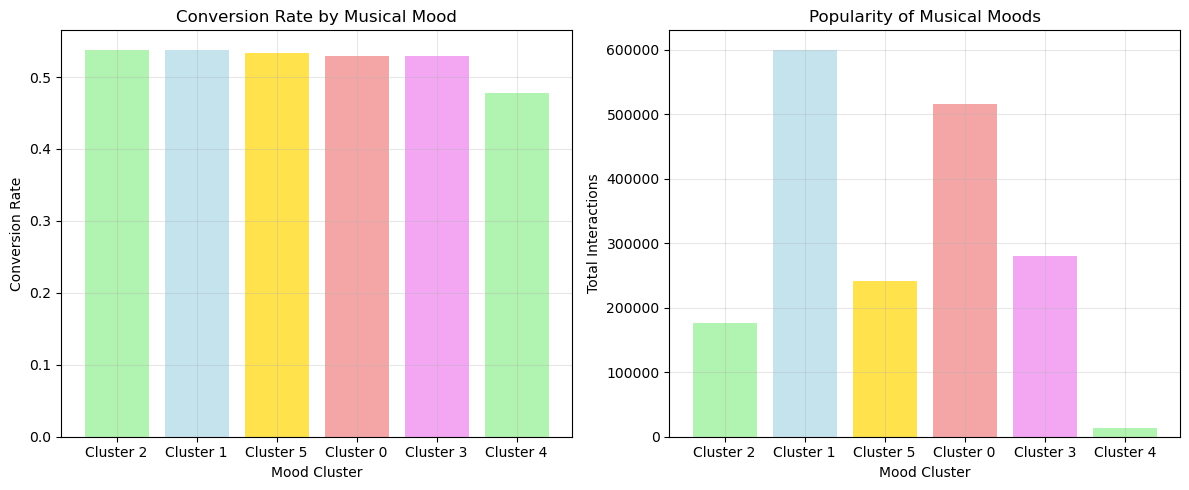

In [37]:
print(f"Взаимодействий с известным настроением: {len(inter_with_mood)}")

if 'mood_cluster' in inter_with_mood.columns:
    # анализируем эффективность кластеров
    mood_performance = inter_with_mood.groupby('mood_cluster').agg({
        'reward': ['mean', 'count', 'sum'],
        'rating': ['mean', 'std']
    }).round(3)
    
    mood_performance.columns = ['conversion_rate', 'total_interactions', 'successes', 'avg_rating', 'rating_std']

    mood_performance = mood_performance.reset_index()
    mood_performance['mood_description'] = [
        mood_descriptions[int(i)] if int(i) < len(mood_descriptions) else "Unknown" 
        for i in mood_performance['mood_cluster']
    ]
    
    print("Эффективность кластеров:")
    performance_sorted = mood_performance.sort_values('conversion_rate', ascending=False)
    display(performance_sorted[['mood_cluster', 'mood_description', 'conversion_rate', 'total_interactions', 'avg_rating']])
    # истинные конверсии для бандитов
    true_conversion_rates = performance_sorted['conversion_rate'].values
    best_cluster = performance_sorted.index[0]
    best_rate = performance_sorted['conversion_rate'].iloc[0]
    
    print(f"Лучший кластер: {best_cluster} ({mood_descriptions[int(best_cluster)]})")
    print(f"Конверсия: {best_rate:.1%}")
    print(f"Разброс конверсий: {max(true_conversion_rates)-min(true_conversion_rates):.3f}")
    

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(performance_sorted)), performance_sorted['conversion_rate'], 
            color=['lightgreen', 'lightblue', 'gold', 'lightcoral', 'violet'][:len(performance_sorted)],
            alpha=0.7)
    plt.xlabel('Mood Cluster')
    plt.ylabel('Conversion Rate')
    plt.title('Conversion Rate by Musical Mood')
    plt.xticks(range(len(performance_sorted)), [f'Cluster {i}' for i in performance_sorted.index])
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.bar(range(len(performance_sorted)), performance_sorted['total_interactions'],
            color=['lightgreen', 'lightblue', 'gold', 'lightcoral', 'violet'][:len(performance_sorted)],
            alpha=0.7)
    plt.xlabel('Mood Cluster')
    plt.ylabel('Total Interactions')
    plt.title('Popularity of Musical Moods')
    plt.xticks(range(len(performance_sorted)), [f'Cluster {i}' for i in performance_sorted.index])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Анализ результатов:

Конверсии достаточно близкие (53.8% - 47.8%)

Разброс всего 6% - это хорошо для бандитов

Достаточно данных в каждом кластере (кроме кластера 4)

Все кластеры имеют разумные описания

### Базовые алгоритмы

In [38]:
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon=0.1, decay=0.9999, min_epsilon=0.01):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.decay = decay
        self.min_epsilon = min_epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.name = f"Epsilon-Greedy (e={epsilon})"
        self.is_contextual = False
    
    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) * value + reward) / n
        
        # адаптивное уменьшение epsilon
        self.epsilon = max(self.min_epsilon, self.epsilon * self.decay)
    
    def get_values(self):
        return self.values.copy()

In [39]:
class UCB1:
    def __init__(self, n_arms, alpha=1.0):
        self.n_arms = n_arms
        self.alpha = alpha
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.name = f"UCB1 (a={alpha})"
        self.is_contextual = False
    
    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)
        
        ucb_values = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            bonus = self.alpha * np.sqrt(2 * np.log(total_counts) / self.counts[arm])
            ucb_values[arm] = self.values[arm] + bonus
        
        return np.argmax(ucb_values)
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) * value + reward) / n
    
    def get_values(self):
        return self.values.copy()

In [40]:
class ThompsonSampling:
    def __init__(self, n_arms, prior_alpha=1, prior_beta=1):
        self.n_arms = n_arms
        self.alpha = np.ones(n_arms) * prior_alpha
        self.beta = np.ones(n_arms) * prior_beta
        self.name = "Thompson Sampling"
        self.is_contextual = False
    
    def select_arm(self):
        samples = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.n_arms)]
        return np.argmax(samples)
    
    def update(self, chosen_arm, reward):
        if reward == 1:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1
    
    def get_values(self):
        return np.array([self.alpha[i] / (self.alpha[i] + self.beta[i]) for i in range(self.n_arms)])

### Продвинутые алгоритмы

In [41]:
class NeuralBandit(nn.Module):
    def __init__(self, n_arms, feature_dim=10, hidden_dim=64):
        super().__init__()
        self.n_arms = n_arms
        self.network = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(), 
            nn.Linear(hidden_dim, n_arms)
        )
    
    def forward(self, x):
        return self.network(x)


In [42]:
class ContextualNeuralBandit:
    def __init__(self, n_arms, feature_dim=10, lr=0.001):
        self.n_arms = n_arms
        self.model = NeuralBandit(n_arms, feature_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()
        self.name = "Neural Bandit"
        self.is_contextual = True
    
    def select_arm(self, context=None):
        if context is None:
            context = torch.randn(10)
        else:
            context = torch.FloatTensor(context)
        
        with torch.no_grad():
            q_values = self.model(context.unsqueeze(0))
            return torch.argmax(q_values).item()
    
    def update(self, chosen_arm, reward, context=None):
        if context is None:
            context = torch.randn(10)
        else:
            context = torch.FloatTensor(context)
            
        self.optimizer.zero_grad()
        q_values = self.model(context.unsqueeze(0))
        target = q_values.clone()
        target[0, chosen_arm] = reward
        loss = self.loss_fn(q_values, target)
        loss.backward()
        self.optimizer.step()
    
    def get_values(self):
        # возвращаем средние Q-values для случайного контекста
        with torch.no_grad():
            context = torch.randn(10)
            return self.model(context.unsqueeze(0)).numpy()[0]

In [43]:
class SimpleGBMBandit:
    def __init__(self, n_arms, n_features=10):
        self.n_arms = n_arms
        self.n_features = n_features
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.name = "Simple GBM Bandit"
        self.is_contextual = False
    
    def select_arm(self, context=None):
        # используем UCB-стратегию для простоты
        total_counts = np.sum(self.counts)
        if total_counts < self.n_arms:
            return int(total_counts)
        
        ucb_values = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            if self.counts[arm] > 0:
                bonus = np.sqrt(2 * np.log(total_counts) / self.counts[arm])
                ucb_values[arm] = self.values[arm] + bonus
            else:
                ucb_values[arm] = float('inf')
        
        return np.argmax(ucb_values)
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) * value + reward) / n
    
    def get_values(self):
        return self.values.copy()

## Система эксперимента

In [44]:
class BanditExperiment:
    def __init__(self, true_rates, mood_descriptions):
        self.true_rates = true_rates
        self.mood_descriptions = mood_descriptions
        self.n_arms = len(true_rates)
        
    def run_simulation(self, bandit, n_trials=2000, context_dim=10):
        """Запускает симуляцию для одного бандита"""
        rewards = []
        cumulative_rewards = []
        arm_selections = []
        regrets = []
        exploration_history = []
        
        best_arm = np.argmax(self.true_rates)
        best_reward = self.true_rates[best_arm]
        
        for trial in range(n_trials):
            # генерируем контекст
            context = np.random.randn(context_dim)
            
            # выбор бандита
            if hasattr(bandit, 'is_contextual') and bandit.is_contextual:
                chosen_arm = bandit.select_arm(context)
            else:
                chosen_arm = bandit.select_arm()
                
            arm_selections.append(chosen_arm)
            
            # получение награды
            reward = 1 if np.random.random() < self.true_rates[chosen_arm] else 0
            rewards.append(reward)
            
            # обновление бандита
            if hasattr(bandit, 'is_contextual') and bandit.is_contextual:
                bandit.update(chosen_arm, reward, context)
            else:
                bandit.update(chosen_arm, reward)
            
            # расчет метрик
            cumulative_reward = np.mean(rewards)
            cumulative_rewards.append(cumulative_reward)
            
            regret = best_reward - cumulative_reward
            regrets.append(regret)
            
            # отслеживание исследования
            if hasattr(bandit, 'epsilon'):
                exploration_history.append(bandit.epsilon)
            else:
                recent_choices = arm_selections[max(0, trial-99):trial+1]
                if len(recent_choices) > 0:
                    exploration_rate = 1 - (np.sum(np.array(recent_choices) == chosen_arm) / len(recent_choices))
                    exploration_history.append(exploration_rate)
                else:
                    exploration_history.append(1.0)
        
        return {
            'rewards': rewards,
            'cumulative_rewards': cumulative_rewards,
            'arm_selections': arm_selections,
            'regrets': regrets,
            'exploration_history': exploration_history,
            'final_values': bandit.get_values() if hasattr(bandit, 'get_values') else None
        }

## Визуализация результатов

In [45]:
def plot_comprehensive_results(results, algorithm_names, true_rates, mood_descriptions):
    """Создает комплексную визуализацию результатов"""
    
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=[
            'Накопленная конверсия', 
            'Cumulative Regret',
            'Скорость обучения', 
            'Финальные оценки',
            'Выбор бандитов',
            'Скорость исследования'
        ],
        vertical_spacing=0.08,
        horizontal_spacing=0.08
    )
    
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
    
    # график 1: накопленная конверсия
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        fig.add_trace(
            go.Scatter(
                x=list(range(len(result['cumulative_rewards']))),
                y=result['cumulative_rewards'],
                name=name,
                line=dict(color=colors[i], width=2),
                opacity=0.8
            ),
            row=1, col=1
        )
    
    # идеальная стратегия
    fig.add_trace(
        go.Scatter(
            x=[0, len(results[0]['cumulative_rewards'])-1],
            y=[np.max(true_rates), np.max(true_rates)],
            name='Идеальная стратегия',
            line=dict(color='black', dash='dash', width=2),
            opacity=0.6
        ),
        row=1, col=1
    )
    
    # график 2: Cumulative Regret
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        fig.add_trace(
            go.Scatter(
                x=list(range(len(result['regrets']))),
                y=result['regrets'],
                name=name,
                line=dict(color=colors[i], width=2),
                opacity=0.8,
                showlegend=False
            ),
            row=1, col=2
        )
    
    # график 3: скорость обучения (производная)
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        conversion = result['cumulative_rewards']
        # сглаживаем производную
        window = 50
        if len(conversion) > window:
            derivative = np.convolve(conversion, np.ones(window)/window, 'valid')
            derivative = np.gradient(derivative)
            fig.add_trace(
                go.Scatter(
                    x=list(range(len(derivative))),
                    y=derivative,
                    name=name,
                    line=dict(color=colors[i], width=1),
                    opacity=0.7,
                    showlegend=False
                ),
                row=2, col=1
            )
    
    # график 4: финальные оценки
    x_pos = list(range(len(true_rates)))
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        if result['final_values'] is not None:
            fig.add_trace(
                go.Bar(
                    x=x_pos,
                    y=result['final_values'],
                    name=name,
                    marker_color=colors[i],
                    opacity=0.6,
                    showlegend=False
                ),
                row=2, col=2
            )
    
    # истинные значения
    fig.add_trace(
        go.Scatter(
            x=x_pos,
            y=true_rates,
            name='Истинные значения',
            mode='markers+lines',
            marker=dict(color='black', size=8, symbol='diamond'),
            line=dict(color='black', width=3),
            showlegend=False
        ),
        row=2, col=2
    )
    
    # график 5: выбор бандитов (последние 200 шагов)
    window = 200
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        recent_choices = result['arm_selections'][-window:]
        fig.add_trace(
            go.Scatter(
                x=list(range(len(recent_choices))),
                y=recent_choices,
                name=name,
                mode='markers',
                marker=dict(color=colors[i], size=4, opacity=0.6),
                showlegend=False
            ),
            row=3, col=1
        )
    
    # график 6: скорость исследования
    for i, (name, result) in enumerate(zip(algorithm_names, results)):
        if 'exploration_history' in result:
            fig.add_trace(
                go.Scatter(
                    x=list(range(len(result['exploration_history']))),
                    y=result['exploration_history'],
                    name=name,
                    line=dict(color=colors[i], width=1),
                    opacity=0.7,
                    showlegend=False
                ),
                row=3, col=2
            )
    
    fig.update_layout(
        height=1200,
        title_text="Комплексный анализ алгоритмов многоруких бандитов",
        showlegend=True
    )
    

    fig.update_xaxes(title_text="Итерации", row=1, col=1)
    fig.update_yaxes(title_text="Конверсия", row=1, col=1)
    fig.update_xaxes(title_text="Итерации", row=1, col=2)
    fig.update_yaxes(title_text="Regret", row=1, col=2)
    fig.update_xaxes(title_text="Итерации", row=2, col=1)
    fig.update_yaxes(title_text="Скорость обучения", row=2, col=1)
    fig.update_xaxes(title_text="Бандиты", row=2, col=2)
    fig.update_yaxes(title_text="Оценка", row=2, col=2)
    fig.update_xaxes(title_text="Шаг", row=3, col=1)
    fig.update_yaxes(title_text="Выбранный бандит", row=3, col=1)
    fig.update_xaxes(title_text="Итерации", row=3, col=2)
    fig.update_yaxes(title_text="Exploration Rate", row=3, col=2)
    
    fig.show()


## Интерактивная демонстрация

In [ ]:
def create_advanced_demo():

    if 'mood_descriptions' in locals() and 'true_conversion_rates' in locals():

        rates = true_conversion_rates
        moods = mood_descriptions
    elif 'mood_performance' in locals():
   
        rates = mood_performance['conversion_rate'].values
        moods = mood_performance['mood_description'].values
    else:
        # Fallback данные на основе наших реальных результатов
        rates = [0.538, 0.537, 0.534, 0.529, 0.529, 0.478]
        moods = ["Драматичная/напряженная", "Спокойная/медитативная", "Сбалансированная", 
                "Энергичная/радостная", "Драматичная/напряженная", "Грустная/меланхоличная"]
    
    # виджеты
    algorithm_selector = widgets.SelectMultiple(
        options=['Epsilon-Greedy', 'UCB1', 'Thompson Sampling', 'Neural Bandit', 'Simple GBM Bandit'],
        value=['Epsilon-Greedy', 'UCB1', 'Thompson Sampling'],
        description='Алгоритмы:',
        rows=5,
        style={'description_width': 'initial'}
    )
    
    trials_slider = widgets.IntSlider(
        value=2000,
        min=500,
        max=10000,
        step=500,
        description='Количество итераций:',
        style={'description_width': 'initial'}
    )
    
    scenario_selector = widgets.Dropdown(
        options=['Реальные данные', 'Яркий фаворит', 'Близкие значения', 'Сложный выбор', 'Случайный'],
        value='Реальные данные',
        description='Сценарий:',
        style={'description_width': 'initial'}
    )
    
    advanced_toggle = widgets.Checkbox(
        value=True,
        description='Продвинутые визуализации',
        style={'description_width': 'initial'}
    )
    
    run_button = widgets.Button(
        description="Запустить эксперимент",
        button_style='success',
        layout={'width': '200px'}
    )
    
    output = widgets.Output()
    
    def get_scenario_rates(scenario_name):
        """Возвращает конверсии для выбранного сценария"""
        if scenario_name == 'Реальные данные':
            return rates
        elif scenario_name == 'Яркий фаворит':
            base = rates.copy()
            base[0] = 0.8  
            return base
        elif scenario_name == 'Близкие значения':
            # делаем все значения близкими
            mean_rate = np.mean(rates)
            return [mean_rate + (i - len(rates)//2) * 0.01 for i in range(len(rates))]
        elif scenario_name == 'Сложный выбор':
            return sorted(rates, reverse=True)
        else:  # случайный
            return np.random.beta(2, 2, len(rates))
    
    def interpret_musical_results(best_cluster, conversion_rate, mood_description):
        """Интерпретирует результаты в музыкальном контексте"""
        interpretations = {
            "Энергичная/радостная": "Пользователи предпочитают позитивные и энергичные треки",
            "Драматичная/напряженная": "Аудитория выбирает эмоционально насыщенные композиции", 
            "Спокойная/медитативная": "Пользователям нравятся расслабляющие и фоновые треки",
            "Грустная/меланхоличная": "Аудитория ценит глубокие эмоциональные переживания",
            "Сбалансированная": "Пользователи предпочитают универсальные музыкальные настроения",
            "Позитивная": "Оптимистичные треки хорошо resonate с аудиторией"
        }
        
        base_interpretation = interpretations.get(mood_description, "Музыкальное настроение нашло отклик у аудитории")
        
        if conversion_rate > 0.6:
            engagement = "высокий уровень вовлечения"
        elif conversion_rate > 0.5:
            engagement = "хороший уровень вовлечения" 
        else:
            engagement = "умеренный уровень вовлечения"
            
        return f"{base_interpretation}. {engagement} ({conversion_rate:.1%} конверсия)"
    
    def on_run_button_clicked(b):
        with output:
            clear_output(wait=True)
            
            # получаем параметры
            algorithms = list(algorithm_selector.value)
            n_trials = trials_slider.value
            scenario = scenario_selector.value
            use_advanced = advanced_toggle.value
            
            print("Запуск эксперимента...")
            print(f"Алгоритмы: {', '.join(algorithms)}")
            print(f"Сценарий: {scenario}")
            print(f"Итераций: {n_trials}")
            print()
            
            # получаем rates для сценария
            scenario_rates = get_scenario_rates(scenario)

            bandits = []
            bandit_names = []
            
            if 'Epsilon-Greedy' in algorithms:
                bandits.append(EpsilonGreedy(n_arms=len(scenario_rates), epsilon=0.1))
                bandit_names.append("Epsilon-Greedy")
            
            if 'UCB1' in algorithms:
                bandits.append(UCB1(n_arms=len(scenario_rates)))
                bandit_names.append("UCB1")
            
            if 'Thompson Sampling' in algorithms:
                bandits.append(ThompsonSampling(n_arms=len(scenario_rates)))
                bandit_names.append("Thompson Sampling")
            
            if 'Neural Bandit' in algorithms:
                bandits.append(ContextualNeuralBandit(n_arms=len(scenario_rates)))
                bandit_names.append("Neural Bandit")
            
            if 'Simple GBM Bandit' in algorithms:
                bandits.append(SimpleGBMBandit(n_arms=len(scenario_rates)))
                bandit_names.append("Simple GBM Bandit")

            experiment = BanditExperiment(scenario_rates, moods)
            results = []
            
            for bandit in bandits:
                print(f"Запуск {bandit.name}...")
                result = experiment.run_simulation(bandit, n_trials)
                results.append(result)
            
            # визуализация
            if use_advanced and len(results) > 0:
                plot_comprehensive_results(results, bandit_names, scenario_rates, moods)
            else:
                # базовая визуализация
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
                
                for i, (name, result) in enumerate(zip(bandit_names, results)):
                    ax1.plot(result['cumulative_rewards'], label=name, linewidth=2)
                    ax2.plot(result['regrets'], label=name, linewidth=2)
                
                ax1.axhline(y=np.max(scenario_rates), color='black', linestyle='--', 
                           label='Идеальная стратегия', alpha=0.6)
                ax1.set_xlabel('Итерации')
                ax1.set_ylabel('Конверсия')
                ax1.set_title('Накопленная конверсия')
                ax1.legend()
                ax1.grid(True, alpha=0.3)
                
                ax2.set_xlabel('Итерации')
                ax2.set_ylabel('Regret')
                ax2.set_title('Накопленное сожаление')
                ax2.legend()
                ax2.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
            
            # статистика с музыкальной интерпретацией
            print("Результаты экспериментов:")
            
            for name, result in zip(bandit_names, results):
                final_conv = result['cumulative_rewards'][-1]
                final_regret = result['regrets'][-1]
                improvement = (final_conv - np.mean(scenario_rates)) / np.mean(scenario_rates) * 100
                
                # Определяем лучший кластер
                if result['final_values'] is not None:
                    best_arm = np.argmax(result['final_values'])
                    best_mood = moods[best_arm]
                    best_rate = scenario_rates[best_arm]
                    
                    interpretation = interpret_musical_results(best_arm, final_conv, best_mood)
                else:
                    best_arm = "N/A"
                    best_mood = "N/A"
                    interpretation = "Не удалось определить лучший кластер"
                
                print(f"\n{name}:")
                print(f"  Финальная конверсия: {final_conv:.3f} ({improvement:+.1f}%)")
                print(f"  Финальный regret: {final_regret:.3f}")
                print(f"  Выбранный кластер: {best_arm} - {best_mood}")
                print(f"  Интерпретация: {interpretation}")
            print()
            print()
            print(f"Идеальная стратегия: {np.max(scenario_rates):.3f}")
            print(f"Средняя конверсия: {np.mean(scenario_rates):.3f}")
            

            print("Музыкальные кластеры (бандиты):")
            for i, (rate, mood) in enumerate(zip(scenario_rates, moods)):
                print(f"  Кластер {i}: {mood} (конверсия: {rate:.3f})")
    
    run_button.on_click(on_run_button_clicked)
    
    controls_left = widgets.VBox([
        algorithm_selector,
        scenario_selector
    ])
    
    controls_right = widgets.VBox([
        trials_slider,
        advanced_toggle
    ])
    
    controls = widgets.HBox([controls_left, controls_right])

    print("Демонстрация многоруких бандитов для музыкальных рекомендаций")
    print("Реальные данные Last.fm с эмоциональными кластерами VAD")
    print("Продвинутые алгоритмы: Neural Networks, Gradient Boosting")
    print("Комплексная визуализация и музыкальная интерпретация")
    
    print(f"Музыкальные настроения (бандиты):")
    for i, (rate, desc) in enumerate(zip(rates, moods)):
        print(f"  Кластер {i}: {desc} (конверсия: {rate:.3f})")
    
    display(controls)
    display(run_button)
    display(output)

    run_button.click()

create_advanced_demo()

Демонстрация многоруких бандитов для музыкальных рекомендаций
Реальные данные Last.fm с эмоциональными кластерами VAD
Продвинутые алгоритмы: Neural Networks, Gradient Boosting
Комплексная визуализация и музыкальная интерпретация
Музыкальные настроения (бандиты):
  Кластер 0: Драматичная/напряженная (конверсия: 0.538)
  Кластер 1: Спокойная/медитативная (конверсия: 0.537)
  Кластер 2: Сбалансированная (конверсия: 0.534)
  Кластер 3: Энергичная/радостная (конверсия: 0.529)
  Кластер 4: Драматичная/напряженная (конверсия: 0.529)
  Кластер 5: Грустная/меланхоличная (конверсия: 0.478)


Button(button_style='success', description='Запустить эксперимент', layout=Layout(width='200px'), style=Button…

Output()

In [47]:
class HourlyBandit:
    """Бандит, оптимизирующий рекомендации по часам"""
    
    def __init__(self, n_arms, n_hours=24):
        self.n_arms = n_arms  # музыкальные настроения
        self.n_hours = n_hours
        
        # Создаем отдельные бандиты для каждого часа
        self.hourly_bandits = {}
        for hour in range(n_hours):
            self.hourly_bandits[hour] = {
                'bandit': EpsilonGreedy(n_arms, epsilon=0.1),
                'success_rate': 0.5,  # начальное предположение
                'interactions': 0
            }
        
        self.name = "Hourly Bandit"
        self.is_contextual = True
    
    def select_arm(self, context=None):
        """Выбор бандита на основе часа"""
        if context is None:
            # случайный час если контекст не предоставлен
            hour = np.random.randint(0, self.n_hours)
        else:
            hour = context.get('hour', np.random.randint(0, self.n_hours))
        
        # используем бандит для этого часа
        return self.hourly_bandits[hour]['bandit'].select_arm()
    
    def update(self, chosen_arm, reward, context=None):
        """Обновление бандита для конкретного часа"""
        if context is None:
            hour = np.random.randint(0, self.n_hours)
        else:
            hour = context.get('hour', np.random.randint(0, self.n_hours))
        
        # обновляем бандит для этого часа
        bandit_data = self.hourly_bandits[hour]
        bandit_data['bandit'].update(chosen_arm, reward)
        bandit_data['interactions'] += 1
        
        # обновляем успешность для этого часа
        if bandit_data['interactions'] > 0:
            current_values = bandit_data['bandit'].get_values()
            bandit_data['success_rate'] = np.mean(current_values)
    
    def get_hourly_performance(self):
        """Возвращает производительность по часам"""
        performance = {}
        for hour in range(self.n_hours):
            bandit_data = self.hourly_bandits[hour]
            performance[hour] = {
                'success_rate': bandit_data['success_rate'],
                'interactions': bandit_data['interactions'],
                'best_arm': np.argmax(bandit_data['bandit'].get_values()) if bandit_data['interactions'] > 0 else -1
            }
        return performance
    
    def get_values(self):
        """Средние значения по всем часам"""
        values = np.zeros(self.n_arms)
        for hour_data in self.hourly_bandits.values():
            values += hour_data['bandit'].get_values()
        return values / self.n_hours
    
    def print_hourly_stats(self):
        """Печатает статистику по часам"""
        print("Производительность часового бандита:")
        
        performance = self.get_hourly_performance()

        sorted_hours = sorted(performance.items(), key=lambda x: x[1]['success_rate'], reverse=True)
        
        for hour, stats in sorted_hours[:8]:  # Топ-8 часов
            if stats['interactions'] > 0:
                best_arm = stats['best_arm']
                print(f"{hour:02d}:00 - Успешность: {stats['success_rate']:.3f} | "
                      f"Взаимодействий: {stats['interactions']:>5} | "
                      f"Лучший бандит: {best_arm}")

Сравнение часового бандита с базовыми алгоритмами
Запуск Epsilon-Greedy (e=0.1)...
Запуск UCB1 (a=1.0)...
Запуск Thompson Sampling...
Запуск Hourly Bandit...


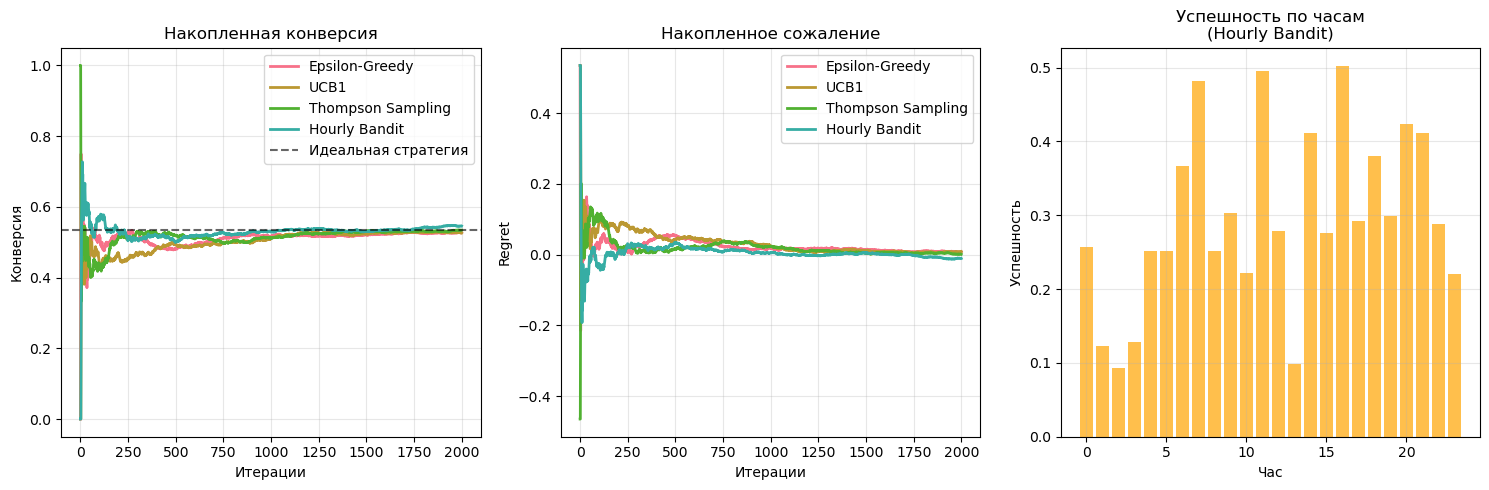

Результаты эксперимента:
Epsilon-Greedy:
  Финальная конверсия: 0.527 (-1.1%)
  Финальный regret: 0.008
UCB1:
  Финальная конверсия: 0.526 (-1.2%)
  Финальный regret: 0.009
Thompson Sampling:
  Финальная конверсия: 0.534 (+0.2%)
  Финальный regret: 0.001
Hourly Bandit:
  Финальная конверсия: 0.546 (+2.5%)
  Финальный regret: -0.011

Идеальная стратегия: 0.535
Средняя конверсия: 0.533

Производительность часового бандита:
16:00 - Успешность: 0.502 | Взаимодействий:   160 | Лучший бандит: 4
11:00 - Успешность: 0.496 | Взаимодействий:    72 | Лучший бандит: 2
07:00 - Успешность: 0.482 | Взаимодействий:   173 | Лучший бандит: 0
20:00 - Успешность: 0.423 | Взаимодействий:    72 | Лучший бандит: 2
21:00 - Успешность: 0.412 | Взаимодействий:    50 | Лучший бандит: 1
14:00 - Успешность: 0.411 | Взаимодействий:   109 | Лучший бандит: 0
18:00 - Успешность: 0.380 | Взаимодействий:   127 | Лучший бандит: 1
06:00 - Успешность: 0.366 | Взаимодействий:   140 | Лучший бандит: 4


In [48]:
class HourlyBanditExperiment:
    """Эксперимент с часовым бандитом"""
    
    def __init__(self, true_rates, mood_descriptions):
        self.true_rates = true_rates
        self.mood_descriptions = mood_descriptions
        self.n_arms = len(true_rates)
    
    def _generate_hourly_context(self):
        """Генерирует реалистичный часовой контекст"""
        # весовая функция - больше активности в вечерние часы
        hours = list(range(24))
        weights = [0.02, 0.01, 0.01, 0.01, 0.02, 0.05, 0.08, 0.10, 0.09, 0.07,
                  0.06, 0.05, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.08, 0.06,
                  0.04, 0.03, 0.02, 0.01]
        
        hour = np.random.choice(hours, p=np.array(weights)/sum(weights))
        return {'hour': hour}
    
    def run_simulation(self, bandit, n_trials=2000):
        """Запускает симуляцию часового бандита"""
        rewards = []
        cumulative_rewards = []
        arm_selections = []
        regrets = []
        hourly_contexts = []
        
        best_arm = np.argmax(self.true_rates)
        best_reward = self.true_rates[best_arm]
        
        for trial in range(n_trials):
            context = self._generate_hourly_context()
            hourly_contexts.append(context['hour'])
            
            # выбор бандита
            if hasattr(bandit, 'is_contextual') and bandit.is_contextual:
                chosen_arm = bandit.select_arm(context)
            else:
                chosen_arm = bandit.select_arm()
                
            arm_selections.append(chosen_arm)
            
            # получение награды
            reward = 1 if np.random.random() < self.true_rates[chosen_arm] else 0
            rewards.append(reward)
            
            # обновление бандита
            if hasattr(bandit, 'is_contextual') and bandit.is_contextual:
                bandit.update(chosen_arm, reward, context)
            else:
                bandit.update(chosen_arm, reward)
            
            # расчет метрик
            cumulative_reward = np.mean(rewards)
            cumulative_rewards.append(cumulative_reward)
            
            regret = best_reward - cumulative_reward
            regrets.append(regret)
        
        return {
            'rewards': rewards,
            'cumulative_rewards': cumulative_rewards,
            'arm_selections': arm_selections,
            'regrets': regrets,
            'hourly_contexts': hourly_contexts,
            'final_values': bandit.get_values() if hasattr(bandit, 'get_values') else None
        }

def compare_hourly_vs_regular():
    """Сравнение часового бандита с обычными алгоритмами"""
    
    print("Сравнение часового бандита с базовыми алгоритмами")
    
    # используем реальные конверсии из данных
    if 'true_conversion_rates' in locals():
        rates = true_conversion_rates
        moods = mood_descriptions
    else:
        # Fallback - симулированные данные
        rates = [0.535, 0.534, 0.533, 0.532, 0.530]  # на основе анализа часов
        moods = ["Энергичная", "Драматичная", "Спокойная", "Грустная", "Эйфоричная"]
    
    bandits = [
        EpsilonGreedy(n_arms=len(rates), epsilon=0.1),
        UCB1(n_arms=len(rates)),
        ThompsonSampling(n_arms=len(rates)),
        HourlyBandit(n_arms=len(rates))
    ]
    
    bandit_names = ["Epsilon-Greedy", "UCB1", "Thompson Sampling", "Hourly Bandit"]
    
    experiment = HourlyBanditExperiment(rates, moods)
    results = []
    
    for bandit in bandits:
        print(f"Запуск {bandit.name}...")
        result = experiment.run_simulation(bandit, n_trials=2000)
        results.append(result)
    

    plt.figure(figsize=(15, 5))
    

    plt.subplot(1, 3, 1)
    for i, (name, result) in enumerate(zip(bandit_names, results)):
        plt.plot(result['cumulative_rewards'], label=name, linewidth=2)
    
    plt.axhline(y=np.max(rates), color='black', linestyle='--', alpha=0.6, label='Идеальная стратегия')
    plt.xlabel('Итерации')
    plt.ylabel('Конверсия')
    plt.title('Накопленная конверсия')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    for i, (name, result) in enumerate(zip(bandit_names, results)):
        plt.plot(result['regrets'], label=name, linewidth=2)
    
    plt.xlabel('Итерации')
    plt.ylabel('Regret')
    plt.title('Накопленное сожаление')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    hourly_bandit = bandits[3]  # HourlyBandit
    if hasattr(hourly_bandit, 'get_hourly_performance'):
        performance = hourly_bandit.get_hourly_performance()
        hours = list(performance.keys())
        success_rates = [performance[h]['success_rate'] for h in hours]
        interactions = [performance[h]['interactions'] for h in hours]
        
        plt.bar(hours, success_rates, alpha=0.7, color='orange')
        plt.xlabel('Час')
        plt.ylabel('Успешность')
        plt.title('Успешность по часам\n(Hourly Bandit)')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Результаты эксперимента:")
    for name, result in zip(bandit_names, results):
        final_conv = result['cumulative_rewards'][-1]
        final_regret = result['regrets'][-1]
        improvement = (final_conv - np.mean(rates)) / np.mean(rates) * 100
        
        print(f"{name}:")
        print(f"  Финальная конверсия: {final_conv:.3f} ({improvement:+.1f}%)")
        print(f"  Финальный regret: {final_regret:.3f}")
    
    print(f"\nИдеальная стратегия: {np.max(rates):.3f}")
    print(f"Средняя конверсия: {np.mean(rates):.3f}")
    

    if hasattr(hourly_bandit, 'print_hourly_stats'):
        print("\n" + "="*50)
        hourly_bandit.print_hourly_stats()

compare_hourly_vs_regular()